In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/data/4_23_cleaned_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413710 entries, 0 to 413709
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      413710 non-null  int64  
 1   Location ID     413710 non-null  int64  
 2   Location Name   413710 non-null  object 
 3   Address         413710 non-null  object 
 4   Provider        355445 non-null  object 
 5   Trade           355445 non-null  object 
 6   Category        355445 non-null  object 
 7   ProblemCode     355445 non-null  object 
 8   Tonnage         413710 non-null  float64
 9   Completed Date  413710 non-null  object 
 10  Region          355445 non-null  float64
 11  District        355445 non-null  float64
 12  Priority        69045 non-null   object 
 13  Zip code        58265 non-null   float64
 14  City            413710 non-null  object 
 15  State           413710 non-null  object 
 16  Latitude        413710 non-null  float64
 17  Longitude 

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/2126360370.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/data/4_23_cleaned_data.csv')


<div style="font-size: 25px;">
Splitting data into supercenter and non-supercenter locations, taking out 0s in tonnage
<div>

In [124]:
def split_supercenter(df):
    supercenter_df = df[df['Location Name'].str.contains('Supercenter')]
    non_supercenter_df = df[~df['Location Name'].str.contains('Supercenter')]
    return supercenter_df, non_supercenter_df

supercenter_df, non_supercenter_df = split_supercenter(df)



In [125]:
supercenter_df

,Unnamed: 0,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
2,2,3261,Supercenter FM Reg 12-3,2801 DUPORTAIL ST,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,6.75,2020-11-20,60.0,475.0,NaN,NaN,RICHLAND,WA,46.255981,-119.307922
3,3,2733,Supercenter FM Reg 11-2,1009 SAINT PATRICKS DR,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,10.86,2020-11-27,2.0,32.0,NaN,NaN,PERRY,GA,32.472626,-83.739099
4,4,1059,Supercenter FM Reg 15-10 INSOURCE,1309 HIGHWAY 35 S,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,3.88,2020-12-01,11.0,138.0,NaN,NaN,FOREST,MS,32.338638,-89.486173
5,5,2199,Supercenter FM Reg 11-1,50739 VALLEY PLAZA DR,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,8.51,2020-12-01,20.0,216.0,NaN,NaN,SAINT CLAIRSVILLE,OH,40.075741,-80.875036
7,7,5399,Supercenter FM Reg 12-2,1640 S GALENA AVE,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,7.41,2020-12-04,25.0,279.0,NaN,NaN,DIXON,IL,41.827442,-89.471721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413700,413700,1187,Supercenter,2200 N STATE ST,NaN,NaN,NaN,NaN,7.32,2024-01-31,NaN,NaN,NaN,66749.0,IOLA,KS,37.942863,-95.411625
413703,413703,5428,WM Supercenter,1710 S GREENFIELD RD,NaN,NaN,NaN,NaN,7.34,2024-01-31,NaN,NaN,NaN,85206.0,MESA,AZ,33.384593,-111.739743
413705,413705,5370,WM Supercenter,2514 MAIN ST,NaN,NaN,NaN,NaN,7.75,2024-01-31,NaN,NaN,NaN,80504.0,LONGMONT,CO,40.205153,-105.098807
413708,413708,720,WM Supercenter,301 LEONARDWOOD RD,NaN,NaN,NaN,NaN,9.54,2024-01-31,NaN,NaN,NaN,40601.0,FRANKFORT,KY,38.160546,-84.899191


In [126]:
non_supercenter_df

,Unnamed: 0,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude
0,0,3615,Neighborhood Market FM Reg14-12 INSOURCE,2217 NW 23RD ST,Westrock,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),1.51,2020-11-03,64.0,533.0,NaN,NaN,OKLAHOMA CITY,OK,35.494581,-97.550623
1,1,830,Walmart FM Reg 12-2,1901 1ST AVE,Rubicon Global,SOLID WASTE,REPAIR - REACTIVE,Empty and Return (not a repair),2.78,2020-11-10,25.0,279.0,NaN,NaN,ROCK FALLS,IL,41.763361,-89.687051
6,6,830,Walmart FM Reg 12-2,1901 1ST AVE,Rubicon Global,SOLID WASTE,REPAIR - REACTIVE,Compactor is full and needs to be hauled,2.56,2020-12-04,25.0,279.0,NaN,NaN,ROCK FALLS,IL,41.763361,-89.687051
8,8,1877,Walmart FM Reg 12-4,1250 W HENDERSON AVE,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,0.28,2020-12-05,57.0,581.0,NaN,NaN,PORTERVILLE,CA,36.083402,-119.045347
13,13,2161,Walmart FM Reg 12-4,4501 ROSEWOOD DR,Rubicon Global,TRASH,REPAIR - REACTIVE,Empty and Return current Open Top on Site,0.00,2020-12-05,56.0,511.0,NaN,NaN,PLEASANTON,CA,37.698383,-121.887262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413701,413701,4490,Neighborhood Market,2565 E. COMMERCE CENTER PLACE,NaN,NaN,NaN,NaN,6.72,2024-01-31,NaN,NaN,NaN,85706.0,TUCSON,AZ,32.147489,-110.933161
413702,413702,6630,Sam's Club,7370 W 52ND AVE,NaN,NaN,NaN,NaN,5.23,2024-01-31,NaN,NaN,NaN,80002.0,ARVADA,CO,39.788491,-105.077791
413704,413704,3479,Neighborhood Market,1819 S 8TH ST,NaN,NaN,NaN,NaN,2.99,2024-01-31,NaN,NaN,NaN,72756.0,ROGERS,AR,36.313291,-94.124261
413706,413706,4839,Sam's Club,7757 S OLYMPIA AVENUE W,NaN,NaN,NaN,NaN,9.33,2024-01-31,NaN,NaN,NaN,74132.0,TULSA,OK,36.050971,-96.003787


In [127]:
def drop_zero_tonnage_rows(df):
    df = df[df['Tonnage'] != 0]
    return df

supercenter_df = drop_zero_tonnage_rows(supercenter_df)
non_supercenter_df = drop_zero_tonnage_rows(non_supercenter_df)

<div style="font-size: 25px;">
Plotting the distribution of tonnages in supercenter and non-supercenter locations
<div>

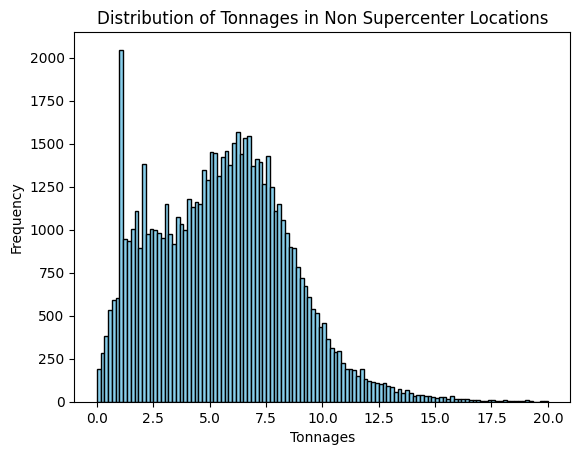

In [128]:
plt.hist(non_supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Non Supercenter Locations')
plt.show()

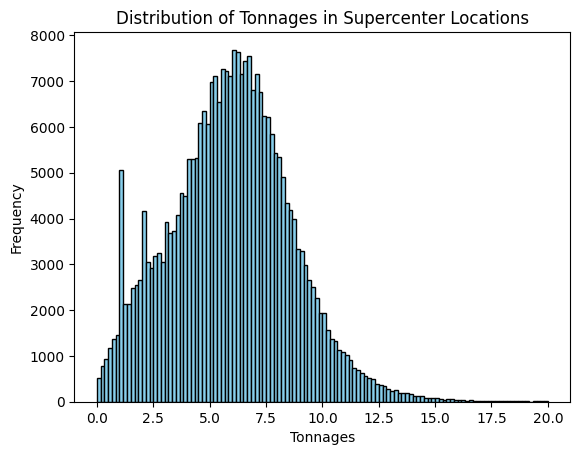

In [129]:
plt.hist(supercenter_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Supercenter Locations')
plt.show()

In [130]:
regular_walmart_df = non_supercenter_df[~non_supercenter_df['Location Name'].str.contains('Neighborhood')]
neighborhood_walmart_df = non_supercenter_df[non_supercenter_df['Location Name'].str.contains('Neighborhood')]


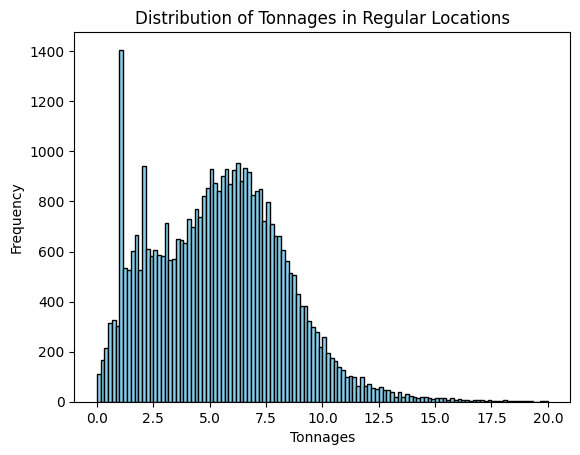

In [131]:
plt.hist(regular_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Regular Locations')
plt.show()

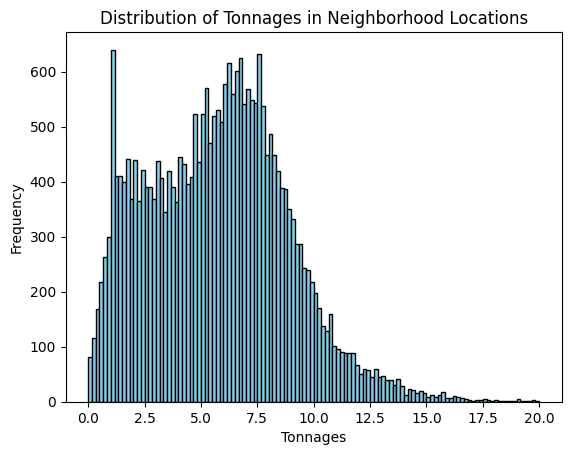

In [132]:
plt.hist(neighborhood_walmart_df['Tonnage'], bins=120, range=(0, 20), color='skyblue', edgecolor='black')
plt.xlabel('Tonnages')
plt.ylabel('Frequency')
plt.title('Distribution of Tonnages in Neighborhood Locations')
plt.show()

<div style="font-size: 25px;">
Ermmm guys there seems to be no difference between regular and neighborhood walmart locations 🤓. However, supercenter locations seem to have more normally distributed tonnages than non-supercenter locations!!
<div>

In [133]:
non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/3524380976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Completed Date'] = pd.to_datetime(non_supercenter_df['Completed Date'])
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/3524380976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Completed Date'] = pd.to_datetime(supercenter_df['Completed Date'])


<div style="font-size: 25px;">
adding new column: days since last pickup
<div>

In [134]:
supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/1173104826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df['Days Since Last Pickup'] = supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/1173104826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Days Since Last Pickup
4607,1,Supercenter FM Reg 10-9 INSOURCE,2110 W WALNUT ST,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,7.26,2021-01-14,42.0,323.0,NaN,NaN,ROGERS,AR,36.331300,-94.149054,NaN
5603,1,Supercenter FM Reg 10-9 INSOURCE,2110 W WALNUT ST,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,6.10,2021-01-21,42.0,323.0,NaN,NaN,ROGERS,AR,36.331300,-94.149054,7.0
8484,1,Supercenter FM Reg 10-9 INSOURCE,2110 W WALNUT ST,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,4.77,2021-01-30,42.0,323.0,NaN,NaN,ROGERS,AR,36.331300,-94.149054,9.0
11032,1,Supercenter FM Reg 10-9 INSOURCE,2110 W WALNUT ST,Westrock,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,8.90,2021-02-05,42.0,323.0,NaN,NaN,ROGERS,AR,36.331300,-94.149054,6.0
11936,1,WM Supercenter,2110 W WALNUT ST,NaN,NaN,NaN,NaN,9.15,2021-02-08,NaN,NaN,NaN,72756.0,ROGERS,AR,36.331300,-94.149054,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370823,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,7.32,2023-09-16,5.0,583.0,Scheduled Service,NaN,DALLAS,TX,32.963381,-96.770249,48.0
378131,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor needs emptied,8.25,2023-10-04,5.0,583.0,Scheduled Service,NaN,DALLAS,TX,32.963381,-96.770249,18.0
381872,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,8.37,2023-10-12,5.0,583.0,P3-Onsite w/I 3 days,NaN,DALLAS,TX,32.963381,-96.770249,8.0
386783,8930,Supercenter FS Reg 13B-11 Scott Raye,15757 COIT RD,Rubicon Global,SOLID WASTE,MAINTENANCE,Compactor is full and needs to be hauled,10.42,2023-10-23,5.0,583.0,P3-Onsite w/I 3 days,NaN,DALLAS,TX,32.963381,-96.770249,11.0


In [135]:
non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)
non_supercenter_df.drop(columns = ['Unnamed: 0'])

/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/911910718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df['Days Since Last Pickup'] = non_supercenter_df.groupby('Location ID')['Completed Date'].diff().dt.days
/var/folders/rc/2n83tm652837dxjbhsw257_m0000gn/T/ipykernel_56368/911910718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_supercenter_df.sort_values(by=['Location ID', 'Completed Date'], inplace=True)


,Location ID,Location Name,Address,Provider,Trade,Category,ProblemCode,Tonnage,Completed Date,Region,District,Priority,Zip code,City,State,Latitude,Longitude,Days Since Last Pickup
15108,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,4.22,2021-02-19,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,NaN
27190,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,8.28,2021-04-02,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,42.0
36522,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,9.35,2021-05-08,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,36.0
43399,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,1.96,2021-06-01,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,24.0
46771,32,Walmart FM Reg 13-7 INSOURCE,2050 WEST HWY 76,Rubicon Global,Solid Waste,MAINTENANCE,Compactor is full and needs to be hauled,9.69,2021-06-22,40.0,333.0,NaN,NaN,BRANSON,MO,36.639045,-93.259769,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413140,30095,Unknown,2403 SE J Street,NaN,NaN,NaN,NaN,1.08,2024-01-23,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.346243,-94.195376,13.0
181439,30099,Unknown,2914 SE I ST,NaN,NaN,NaN,NaN,10.79,2022-06-06,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.340990,-94.200230,NaN
247041,30099,Unknown,2914 SE I ST,NaN,NaN,NaN,NaN,7.46,2022-11-25,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.340990,-94.200230,172.0
326393,30099,Unknown,2914 SE I ST,NaN,NaN,NaN,NaN,10.44,2023-06-12,NaN,NaN,NaN,72712.0,BENTONVILLE,AR,36.340990,-94.200230,199.0
